Name : Aditya Chakraborty

**Problem statement**

Image Classifier

Participants have to make an image classifier. Given a dataset (split into train and test) which contains images of grocery items make an image classifier.

To get the dataset from Kaggle, all the requirements are :

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()   #upload kaggle.json file here that is taken from Kaggle account API token

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            356  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           2136  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           1231  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59            143  
nehaprabhavalkar/india

In [ ]:
#updating version
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.8:
  Successfully uninstalled kaggle-1.5.8
     |████████████████████████████████| 1.5MB 4.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=0e42209b711e52f936ec9e80ae4cb2224804e196e35c7ed011ee38bfb837c0dc
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle


In [ ]:
#download the dataset in .zip format
! kaggle competitions download -c MLChallenge

 51% 5.00M/9.72M [00:00<00:00, 28.9MB/s]
100% 9.72M/9.72M [00:00<00:00, 50.7MB/s]


In [ ]:
#unzip the .zip file
!unzip MLChallenge.zip

Archive:  MLChallenge.zip
  inflating: ML/Test/100.jpg         
  inflating: ML/Test/101.jpg         
  inflating: ML/Test/102.jpg         
  inflating: ML/Test/103.jpg         
  inflating: ML/Test/104.jpg         
  inflating: ML/Test/105.jpg         
  inflating: ML/Test/106.jpg         
  inflating: ML/Test/107.jpg         
  inflating: ML/Test/108.jpg         
  inflating: ML/Test/109.jpg         
  inflating: ML/Test/110.jpg         
  inflating: ML/Test/1141.jpg        
  inflating: ML/Test/1142.jpg        
  inflating: ML/Test/1143.jpg        
  inflating: ML/Test/1144.jpg        
  inflating: ML/Test/1145.jpg        
  inflating: ML/Test/1146.jpg        
  inflating: ML/Test/1147.jpg        
  inflating: ML/Test/1148.jpg        
  inflating: ML/Test/1149.jpg        
  inflating: ML/Test/1150.jpg        
  inflating: ML/Test/1151.jpg        
  inflating: ML/Test/1152.jpg        
  inflating: ML/Test/1153.jpg        
  inflating: ML/Test/1154.jpg        
  inflating: ML/Test/115

In [ ]:
#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

In [ ]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#Import fastai dependencies
from fastai.vision import *

In [ ]:
# to make folder 
(Path(root_path)/'Train').mkdir(parents=True, exist_ok=True)

In [ ]:
#save project path 
proj_path = '/content/ML'

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
train_folder = '/content/ML/Train'
test_folder = '/content/ML/Test'

In [ ]:
# Create data from the data folders with all the standard transformations and normalisations
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train='.', test=test_folder,
                                  valid_pct=0.2, ds_tfms=get_transforms(),
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data

ImageDataBunch;

Train: LabelList (886 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Personal care,Personal care,Personal care,Personal care,Personal care
Path: /content/ML;

Valid: LabelList (221 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chips,Instant,beverages,canned,Bakery
Path: /content/ML;

Test: LabelList (271 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/ML

In [ ]:
data.classes

['Bakery',
 'Battery',
 'Cleanser',
 'Confectional products',
 'Dairy Products',
 'Frozen Food',
 'Fruits',
 'Ice Cream',
 'Instant',
 'Personal care',
 'Poultry products',
 'Snacks',
 'beverages',
 'canned',
 'care',
 'cereals',
 'chips',
 'chocolates',
 'vegetables']

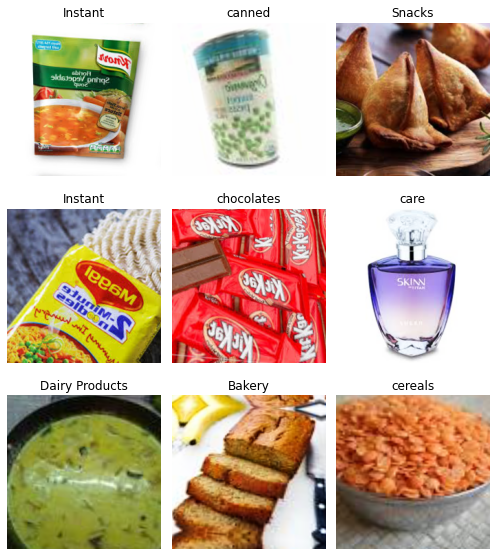

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))


In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bakery',
  'Battery',
  'Cleanser',
  'Confectional products',
  'Dairy Products',
  'Frozen Food',
  'Fruits',
  'Ice Cream',
  'Instant',
  'Personal care',
  'Poultry products',
  'Snacks',
  'beverages',
  'canned',
  'care',
  'cereals',
  'chips',
  'chocolates',
  'vegetables'],
 19,
 886,
 221)

# Training : ResNet152

In [ ]:
from fastai.metrics import accuracy
learn = create_cnn(data, models.resnet152, metrics=accuracy)

In [ ]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (886 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Personal care,Personal care,Personal care,Personal care,Personal care
Path: /content/ML;

Valid: LabelList (221 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chips,Instant,beverages,canned,Bakery
Path: /content/ML;

Test: LabelList (271 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/ML, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)

In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Switch off the warnings to avoid long warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.74E-03
Min loss divided by 10: 8.32E-03


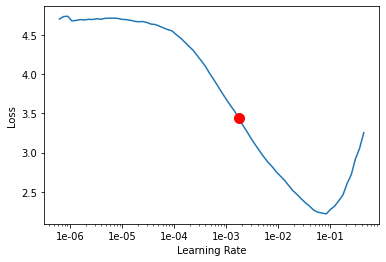

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
lr=8.32e-3   #using the 'Min loss divided by 10' value for lr

In [ ]:
#fit one cycle for 15 epochs
learn.fit_one_cycle(15, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.416270,0.904695,0.791855,00:18
1,1.370152,0.729080,0.868778,00:19
2,0.916372,0.694432,0.864253,00:18
3,0.663521,0.602438,0.877828,00:18
4,0.515353,0.747516,0.864253,00:18
5,0.413515,0.685770,0.882353,00:18
6,0.331457,0.681599,0.882353,00:19
7,0.273050,0.711667,0.891403,00:19
8,0.226323,0.593112,0.891403,00:18
9,0.181233,0.614766,0.877828,00:18


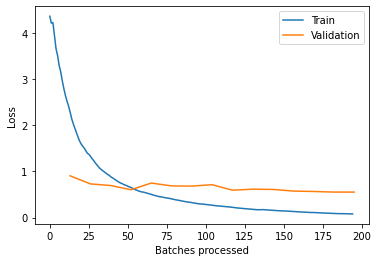

In [ ]:
learn.recorder.plot_losses()

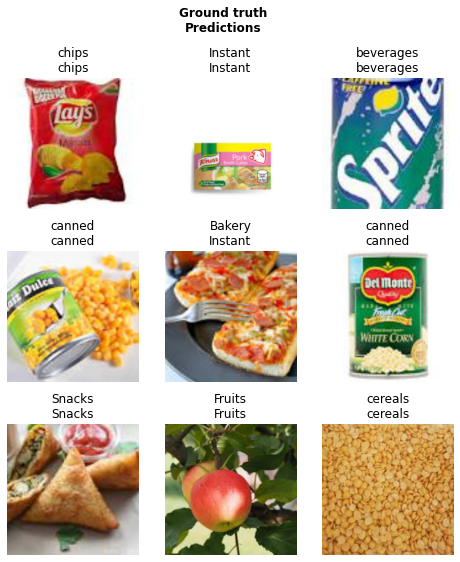

In [ ]:
# show some sample results
learn.show_results(rows=3, figsize=(8,9))

In [ ]:
#save till here
learn.save('stage-1')

## Evaluation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

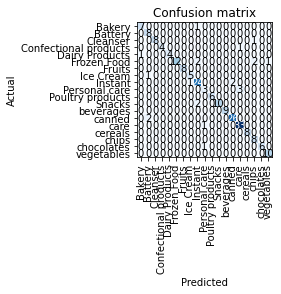

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()  #top mis-classified classes

[('Personal care', 'care', 3),
 ('Frozen Food', 'Instant', 2),
 ('Frozen Food', 'chips', 2),
 ('Instant', 'canned', 2),
 ('Snacks', 'Instant', 2),
 ('canned', 'Battery', 2),
 ('Bakery', 'Instant', 1),
 ('Cleanser', 'chips', 1),
 ('Confectional products', 'care', 1),
 ('Dairy Products', 'Bakery', 1),
 ('Frozen Food', 'vegetables', 1),
 ('Ice Cream', 'Battery', 1),
 ('Instant', 'Ice Cream', 1),
 ('care', 'Personal care', 1),
 ('chocolates', 'Personal care', 1)]

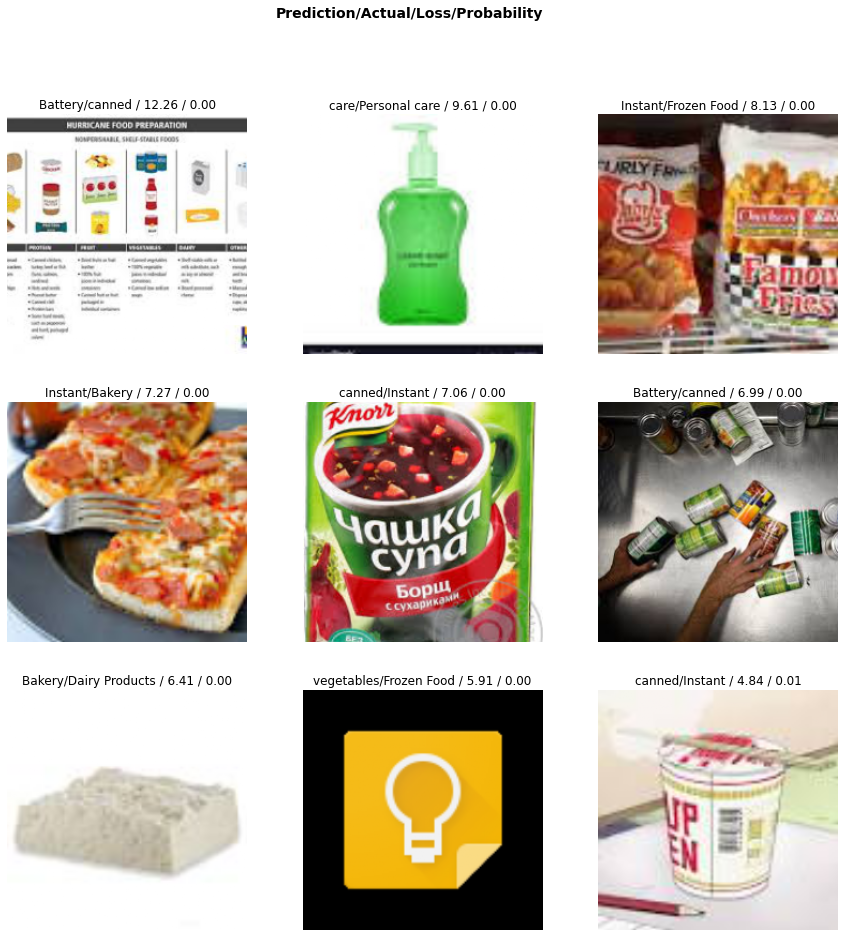

In [ ]:
#plot the top losses with their actual class
interp.plot_top_losses(9, figsize=(15,15))


Testing on few images from the Test folder :

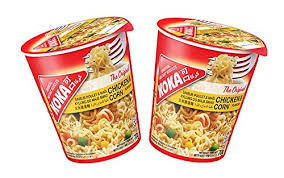

In [ ]:
img = open_image('/content/ML/Test/1172.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Instant'

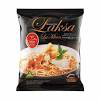

In [ ]:
img1 = open_image('/content/ML/Test/1169.jpg')
img1

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class.obj

'Instant'

## Predition on all of test dataset

In [ ]:
#final accuracy of the model
log_preds, y = learn.TTA()
accuracy(log_preds, y)

tensor(0.8959)

In [ ]:
log_preds_test = learn.get_preds(ds_type = DatasetType.Test)
log_preds_test

[tensor([[2.0677e-06, 1.0195e-03, 1.0402e-04,  ..., 2.6315e-04, 1.1888e-05,
          1.5920e-04],
         [2.2672e-06, 1.4853e-06, 3.5046e-05,  ..., 7.6104e-01, 1.7563e-05,
          2.8775e-05],
         [3.3180e-07, 7.5095e-10, 1.7338e-07,  ..., 6.7974e-09, 1.0000e+00,
          3.1656e-07],
         ...,
         [9.0785e-06, 1.2614e-03, 5.8146e-05,  ..., 1.8652e-04, 1.4754e-04,
          2.8588e-07],
         [4.7309e-07, 1.2517e-06, 3.5987e-05,  ..., 2.2342e-07, 1.3089e-04,
          5.4845e-07],
         [5.3129e-10, 6.4517e-08, 1.2295e-08,  ..., 2.9570e-08, 1.2208e-08,
          4.4273e-05]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
log_preds_test = np.argmax(log_preds_test[0], axis = 1)
preds_classes = [data.classes[i] for i in log_preds_test]
probs = np.exp(log_preds_test)

In [ ]:
#predicted classes
preds_classes

['Instant',
 'chips',
 'chocolates',
 'Instant',
 'Instant',
 'vegetables',
 'Dairy Products',
 'Snacks',
 'Poultry products',
 'Battery',
 'canned',
 'canned',
 'Instant',
 'Cleanser',
 'Poultry products',
 'Instant',
 'vegetables',
 'care',
 'care',
 'Personal care',
 'Frozen Food',
 'Cleanser',
 'Fruits',
 'Dairy Products',
 'Bakery',
 'Snacks',
 'Battery',
 'beverages',
 'Battery',
 'Snacks',
 'care',
 'Instant',
 'Dairy Products',
 'care',
 'Bakery',
 'canned',
 'Cleanser',
 'Poultry products',
 'chips',
 'Confectional products',
 'Instant',
 'chips',
 'canned',
 'beverages',
 'Personal care',
 'cereals',
 'beverages',
 'Instant',
 'Bakery',
 'canned',
 'care',
 'Confectional products',
 'vegetables',
 'Bakery',
 'care',
 'cereals',
 'Fruits',
 'Frozen Food',
 'chocolates',
 'Bakery',
 'cereals',
 'Battery',
 'Battery',
 'Snacks',
 'cereals',
 'Battery',
 'Bakery',
 'canned',
 'chocolates',
 'care',
 'Fruits',
 'cereals',
 'Dairy Products',
 'chips',
 'care',
 'Fruits',
 'Instant'

In [ ]:
#removing .jpg extension from the image names
l=os.listdir(test_folder)
li=[x.split('.')[0] for x in l]

In [ ]:
#final submission
submission = pd.DataFrame({'ID': li, 'Class': preds_classes})
submission.to_csv('submission.csv', index=False)